In [1]:
#
import numpy as np
scores = np.array([109.4, 76.2, 128.7, 93.7, 85.6, 117.7, 117.2, 87.3, 100.3, 55.1])

In [2]:
from scipy import stats

In [10]:
# misal saya menduga rata-rata 50
# 2 arah
tval = abs((50-np.mean(scores))/stats.sem(scores))
td = stats.t(len(scores)-1)
p = 2*td.sf(tval)

print("P-value: ", p)
print("t-value: ", tval)
if p < 0.05:
    print("Tolak H0")
else:
    print("Gagal Tolak H0")


P-value:  8.68520793845785e-05
t-value:  6.716886489884024
Tolak H0


In [8]:
stats.ttest_1samp(scores, 50)

Ttest_1sampResult(statistic=6.716886489884023, pvalue=8.68520793845785e-05)

In [11]:
import pandas as pd
import os

In [12]:
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("ds_salaries.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [19]:
tvalue, pvalue = stats.ttest_1samp(df.salary_in_usd, 100000)

if pvalue < 0.05:
    print("Tolak H0")
    print("Gaji DS rata2nya lebih dari 100000")
else:
    print("Gagal Tolak H0")
    print("Gaji DS rata2nya tidak lebih dari 100000")

Tolak H0
Gaji DS rata2nya lebih dari 100000


In [38]:
df["experience_level"].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [41]:
# Subseting
df_entry = df[df["experience_level"] == "EN"]
df_excutive = df[df["experience_level"]=="EX"]

In [42]:
tvalue, pvalue = stats.ttest_ind(df_entry.salary_in_usd, df_excutive.salary_in_usd, equal_var=False, )

if pvalue < 0.05:
    print("Tolak H0")
    print("Gaji antara executive dan entry tidak sama")
else:
    print("Gagal Tolak H0")
    print("Gaji antara executive dan entry sama")

Tolak H0
Gaji antara executive dan entry tidak sama


{'whiskers': [<matplotlib.lines.Line2D at 0x27a0f237640>,
 'caps': [<matplotlib.lines.Line2D at 0x27a0f237d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x27a0f2372e0>],
 'medians': [<matplotlib.lines.Line2D at 0x27a0f240400>],
 'fliers': [<matplotlib.lines.Line2D at 0x27a0f240760>],
 'means': []}

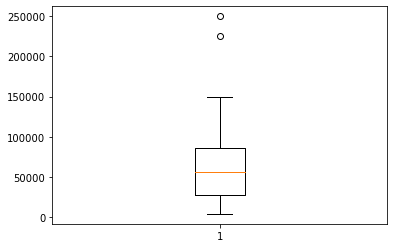

In [43]:
plt.boxplot(df_entry.salary_in_usd)

{'whiskers': [<matplotlib.lines.Line2D at 0x27a0f2941c0>,
 'caps': [<matplotlib.lines.Line2D at 0x27a0f294820>,
 'boxes': [<matplotlib.lines.Line2D at 0x27a0f286e20>],
 'medians': [<matplotlib.lines.Line2D at 0x27a0f294e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x27a0f2a01c0>],
 'means': []}

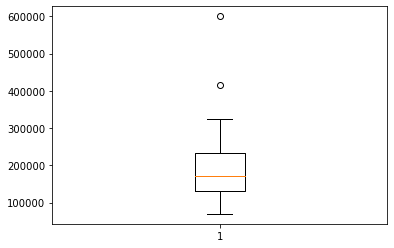

In [44]:
plt.boxplot(df_excutive.salary_in_usd)

Kesimpulan dari data ds_salaries.csv
1. Berdasarkan uji beda, salary antara executive dan entry level berbeda, executive lebih tinggi
2. Terlalu banyak outlier

In [45]:
df["job_title"].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
AI Scientist                                  7
Director of Data Science                      7
Data Analytics Manager                        7
Principal Data Scientist                      7
Data Science Consultant                       7
BI Data Analyst                               6
ML Engineer                                   6
Computer Vision Engineer                      6
Lead Data Engineer                            6
Head of Data                                  5
Applied Data Scientist                        5
Data Engineering Manager                

In [46]:
import seaborn as sns

<AxesSubplot:xlabel='job_title', ylabel='salary_in_usd'>

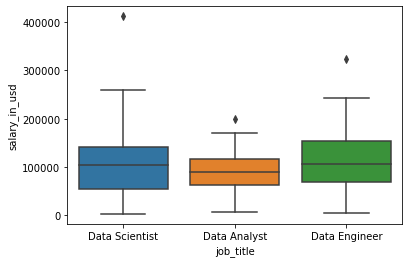

In [52]:
sns.boxplot(x='job_title', y='salary_in_usd', data=df_en_ex)

In [51]:
df_en_ex = df[(df["job_title"] == "Data Scientist") | (df["job_title"] == "Data Analyst") | (df["job_title"] == "Data Engineer")]

C:\Users\Amri\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary_in_usd', ylabel='Density'>

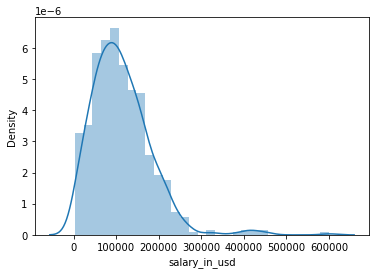

In [53]:
sns.distplot(df.salary_in_usd)